In [24]:
"""
Preamble for most code and jupyter notebooks
@author: tobinsouth
@notebook date: Mar 3, 2022
"""

import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl, seaborn as sns
import math, string, re, pickle, json, os, sys, datetime, itertools
from collections import Counter
from tqdm import tqdm

# Set panda's options
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 120)

# Better graphics
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use('seaborn-poster')

In [25]:
stays = pd.read_csv('../data/stays31080.csv.gz')

In [26]:
grouped_users = stays.groupby('user')

In [ ]:
SEQSIZE = 32

# Saving GEOIDs into a MoveSim compatible data file

In [8]:
all_sequences = []
for i, (user, user_df) in enumerate(tqdm(grouped_users)):
    user_df = user_df.sort_values(by='ini_dat')
    time_diff = user_df['ini_dat'].diff()
    split_points = np.where(time_diff > 60*60*24)[0]
    previous_split = 0
    for split_point in split_points:
        if split_point - previous_split >= SEQSIZE:
            seq = user_df[previous_split:split_point]
            for i in range(1+len(seq) // SEQSIZE):
                mini_seq = seq[i*SEQSIZE:(i+1)*SEQSIZE]
                if len(mini_seq) >= SEQSIZE:
                    all_sequences.append((mini_seq['GEOID'].values, mini_seq['ini_dat'].values))
            previous_split=split_point

100%|██████████| 243644/243644 [02:16<00:00, 1785.44it/s]


In [9]:
GEOID_longlat_map = stays.groupby('GEOID')[['lon_medoid', 'lat_medoid']].median()

In [10]:
GEOID_id_map = dict(zip(GEOID_longlat_map.index, range(len(GEOID_longlat_map))))

In [12]:
# Formatted for MoveSim
mapped_sequences = []
for seq in all_sequences:
    seq = [GEOID_id_map[fq] for fq in seq[0]]
    mapped_sequences.append(seq)
np.random.shuffle(mapped_sequences)

l = len(mapped_sequences)
real, test, val = mapped_sequences[:int(l*0.8)], mapped_sequences[int(l*0.8):int(l*0.9)], mapped_sequences[int(l*0.9):]

with open('../data/real.data', 'w') as f:
    lines=[" ".join([str(l) for l in seq]) +"\n" for seq in real]
    f.writelines(lines)

with open('../data/test.data', 'w') as f:
    lines=[" ".join([str(l) for l in seq]) +"\n" for seq in test]
    f.writelines(lines)

with open('../data/val.data', 'w') as f:
    lines=[" ".join([str(l) for l in seq]) +"\n" for seq in val]
    f.writelines(lines)

# Fake data
with open('../data/dispre.data', 'w') as f:
    lines=[" ".join([str(l) for l in np.random.randint(len(GEOID_id_map), size=SEQSIZE)]) +"\n" for seq in val]
    f.writelines(lines)

id_GEOID_map = {i:fsq for fsq, i in GEOID_id_map.items()}
gps = "\n".join([" ".join(GEOID_longlat_map.loc[geoid].apply(str)) for i, geoid in id_GEOID_map.items()])
with open('../data/gps.data', 'w') as f:
    f.writelines(gps)

In [45]:
!mv ../data/*.data ../MoveSim/data/geoid/

In [23]:
!mv ../MoveSim/data/geoid/gps.data ../MoveSim/data/geoid/gps

## Formatting with foresquare IDs

In [15]:
all_sequences = []
for i, (user, user_df) in enumerate(tqdm(grouped_users)):
    user_df = user_df.sort_values(by='ini_dat')
    time_diff = user_df['ini_dat'].diff()
    split_points = np.where(time_diff > 60*60*24)[0]
    previous_split = 0
    for split_point in split_points:
        if split_point - previous_split >= SEQSIZE:
            seq = user_df[previous_split:split_point]
            for i in range(1+len(seq) // SEQSIZE):
                mini_seq = seq[i*SEQSIZE:(i+1)*SEQSIZE]
                if len(mini_seq) >= SEQSIZE:
                    all_sequences.append((mini_seq['fsq_id'].values, mini_seq['ini_dat'].values))
            previous_split=split_point

100%|██████████| 243644/243644 [02:16<00:00, 1783.36it/s]


In [16]:
fsq_longlat_map = stays.groupby('fsq_id')[['lon_medoid', 'lat_medoid']].median()
fsq_id_map = dict(zip(fsq_longlat_map.index, range(len(fsq_longlat_map))))

In [19]:
# Formatted for MoveSim
mapped_sequences = []
for seq in all_sequences:
    seq = [fsq_id_map[fq] for fq in seq[0]]
    mapped_sequences.append(seq)
np.random.shuffle(mapped_sequences)

l = len(mapped_sequences)
real, test, val = mapped_sequences[:int(l*0.8)], mapped_sequences[int(l*0.8):int(l*0.9)], mapped_sequences[int(l*0.9):]

with open('../data/real.data', 'w') as f:
    lines=[" ".join([str(l) for l in seq]) +"\n" for seq in real]
    f.writelines(lines)

with open('../data/test.data', 'w') as f:
    lines=[" ".join([str(l) for l in seq]) +"\n" for seq in test]
    f.writelines(lines)

with open('../data/val.data', 'w') as f:
    lines=[" ".join([str(l) for l in seq]) +"\n" for seq in val]
    f.writelines(lines)

# Fake data
with open('../data/dispre.data', 'w') as f:
    lines=[" ".join([str(l) for l in np.random.randint(len(id_fsq_map), size=SEQSIZE)]) +"\n" for seq in val]
    f.writelines(lines)

id_fsq_map = {i:fsq for fsq, i in fsq_id_map.items()}
gps = "\n".join([" ".join(fsq_longlat_map.loc[fqs].apply(str)) for i, fqs in id_fsq_map.items()])
with open('../data/gps.data', 'w') as f:
    f.writelines(gps)

In [21]:
!mv ../data/*.data ../MoveSim/data/cuebiq/

In [22]:
!mv ../MoveSim/data/cuebiq/gps.data ../MoveSim/data/cuebiq/gps

# Plotting

Text(0.5, 0, 'Sequence Length of User')

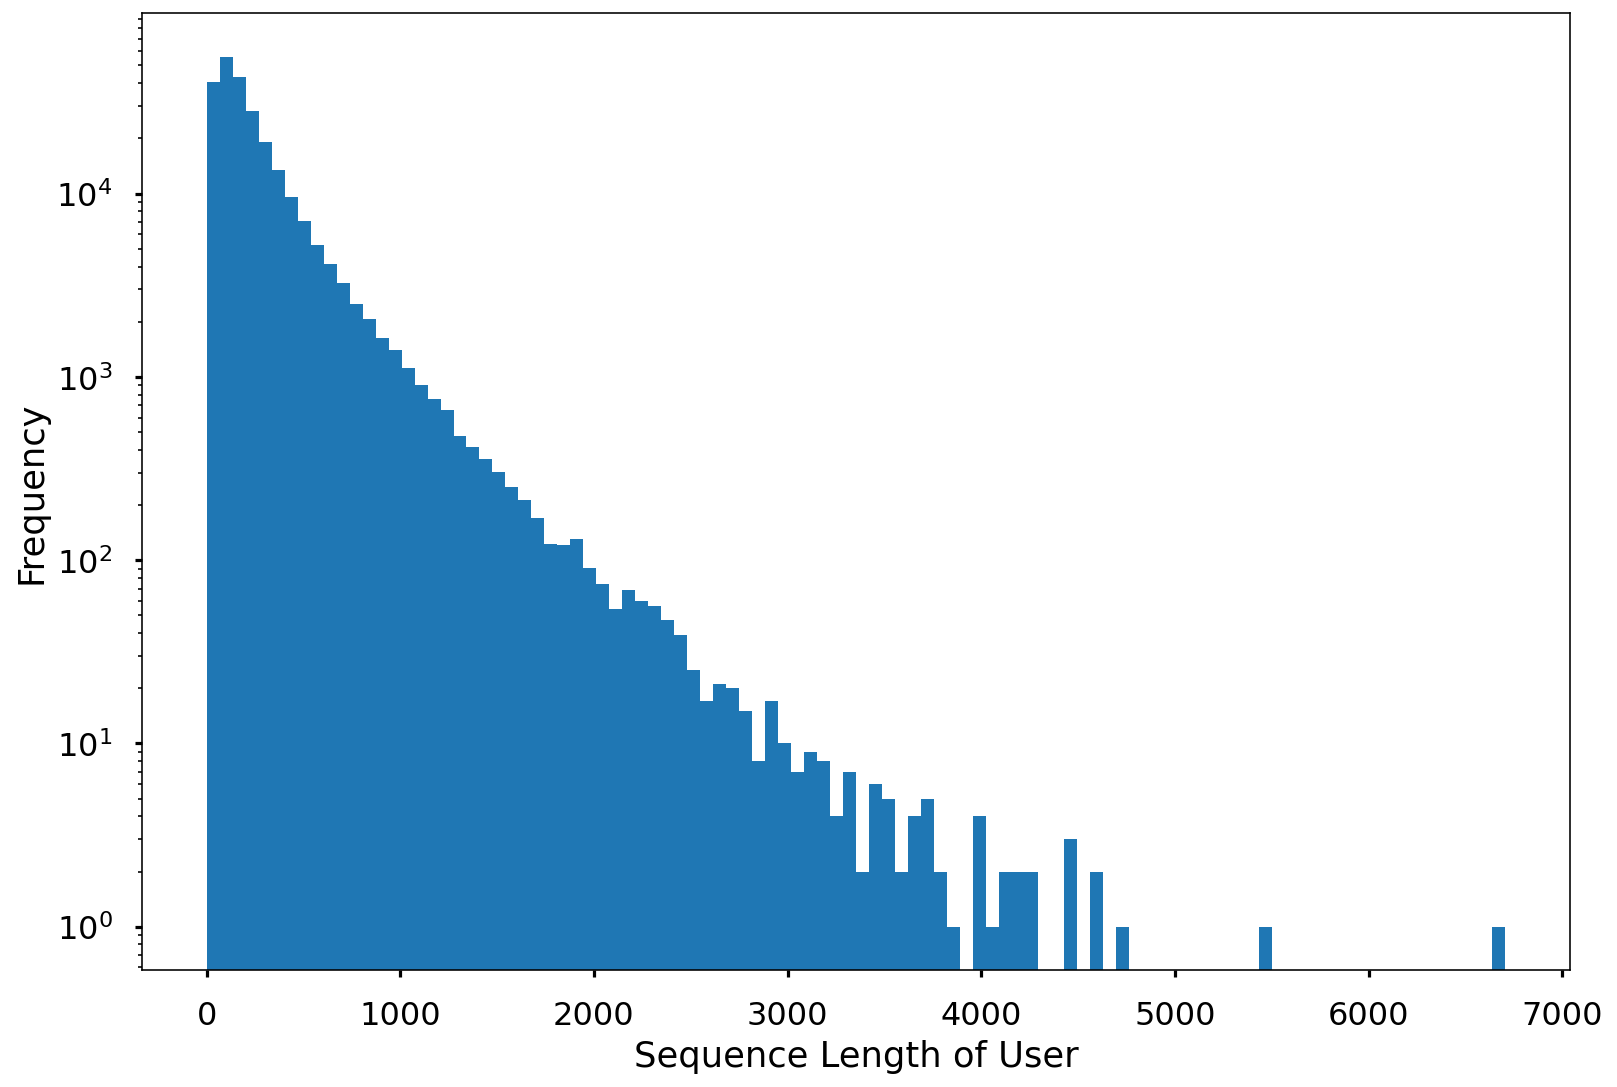

In [29]:
seq_lengths = stays['user'].value_counts()
seq_lengths.plot.hist(logy=True, bins = 100)
plt.xlabel('Sequence Length of User')

239509


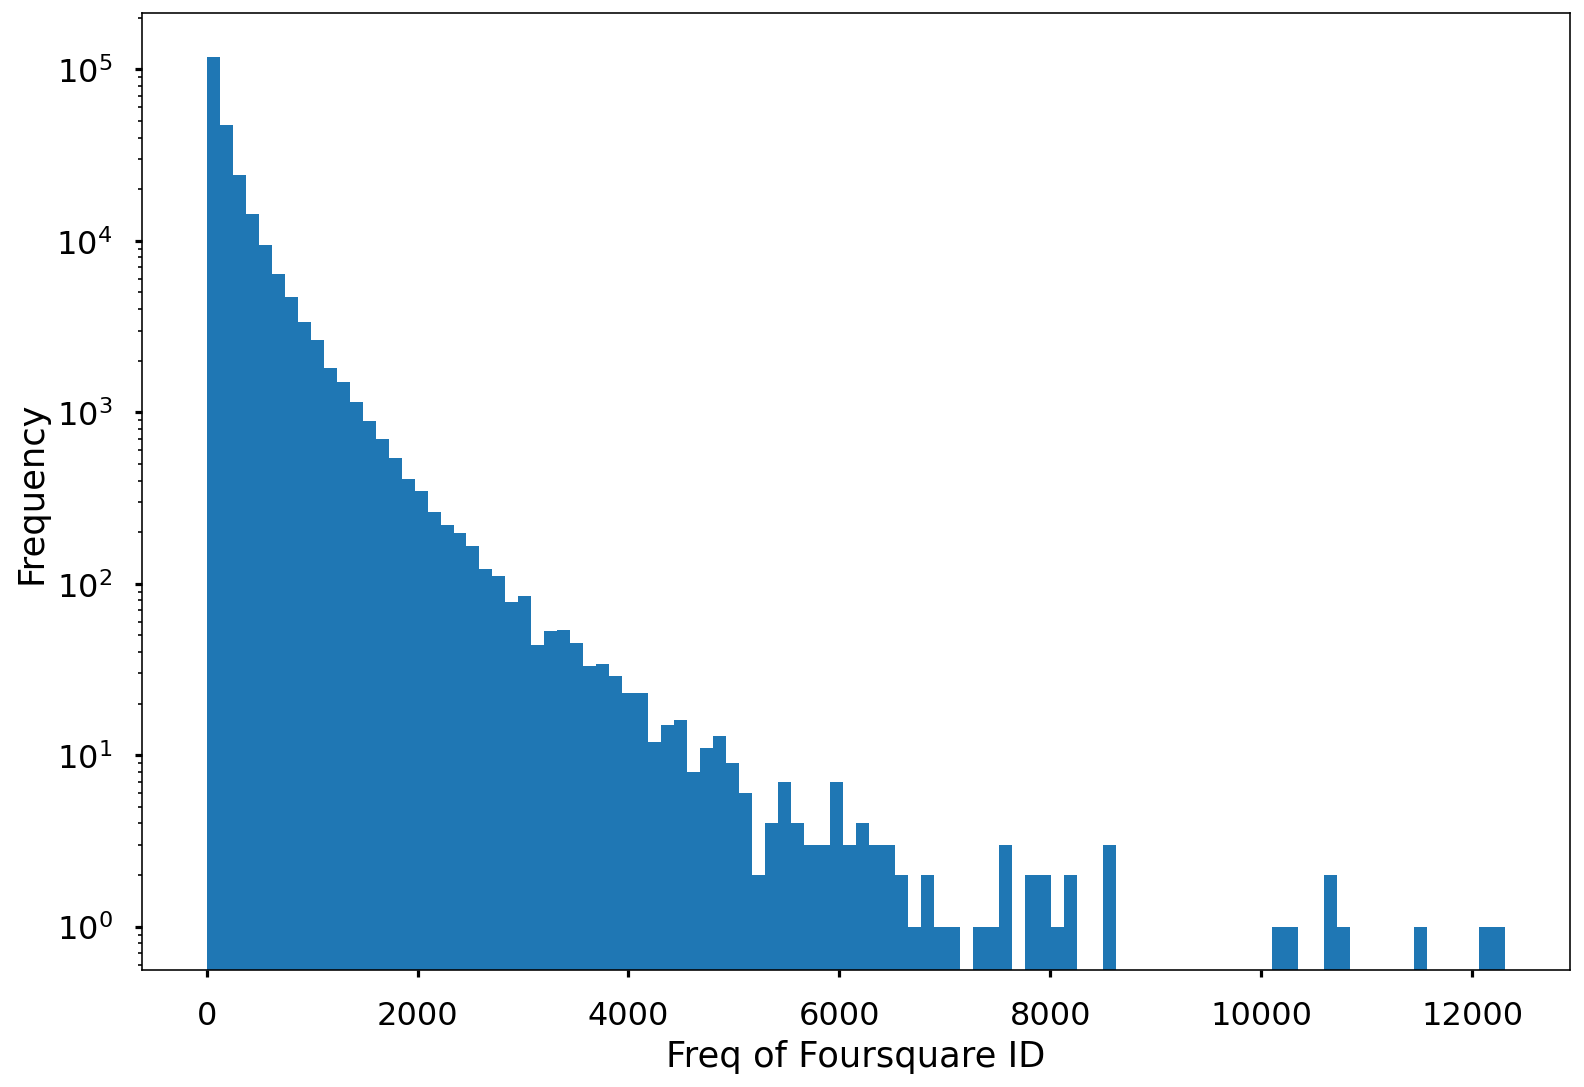

In [69]:
fsq_counts = stays['fsq_id'].value_counts()
fsq_counts.plot.hist(logy=True, bins = 100)
plt.xlabel('Freq of Foursquare ID')
print(len(fsq_counts))

# Removing Low Freq Locations and Trajectories

In [27]:
fsq_counts = stays['fsq_id'].value_counts()

In [102]:
for n in [10, 20, 30, 40, 50, 60, 70, 100]:
    print("n =", n)
    print("total locations", sum(fsq_counts > n), "of", len(fsq_counts), "%.3f" % (sum(fsq_counts > n) / len(fsq_counts)))
    valid_fsq = list(fsq_counts[fsq_counts > n].index)
    stays['fsq_filtered'] =stays['fsq_id'].isin(valid_fsq)
    grouped_users_filtered = stays.groupby('user')
    included_map = [all(udf['fsq_filtered']) for u, udf in grouped_users_filtered]
    print(np.sum(included_map), "of", len(included_map), "%.3f" %  (np.sum(included_map)/len(included_map)))

n = 10
total locations 229380 of 239509 0.958
205920 of 243644 0.845
n = 20
total locations 216834 of 239509 0.905
138137 of 243644 0.567
n = 30
total locations 203976 of 239509 0.852
86854 of 243644 0.356
n = 40
total locations 191702 of 239509 0.800
55076 of 243644 0.226
n = 50
total locations 180143 of 239509 0.752
36397 of 243644 0.149
n = 100
total locations 136420 of 239509 0.570
8618 of 243644 0.035


In [28]:
n = 100
valid_fsq = list(fsq_counts[fsq_counts > n].index)
stays['fsq_filtered'] =stays['fsq_id'].isin(valid_fsq)
grouped_users = stays.groupby('user')    

In [29]:
all_sequences = []
for i, (user, user_df) in enumerate(tqdm(grouped_users)):
    if user_df['fsq_filtered'].all():
        user_df = user_df.sort_values(by='ini_dat')
        time_diff = user_df['ini_dat'].diff()
        split_points = np.where(time_diff > 60*60*24)[0]
        previous_split = 0
        for split_point in split_points:
            if split_point - previous_split >= SEQSIZE:
                seq = user_df[previous_split:split_point]
                for i in range(1+len(seq) // SEQSIZE):
                    mini_seq = seq[i*SEQSIZE:(i+1)*SEQSIZE]
                    if len(mini_seq) >= SEQSIZE:
                        all_sequences.append((mini_seq['fsq_id'].values, mini_seq['ini_dat'].values))
                previous_split=split_point

100%|██████████| 243644/243644 [00:16<00:00, 14827.71it/s]


In [30]:
all_fsq = set(list(itertools.chain.from_iterable([s[0] for s in all_sequences])))
fqs_id_map = dict(zip(all_fsq, range(len(all_fsq))))

In [31]:
# Formatted for MoveSim
mapped_sequences = []
for seq in all_sequences:
    seq = [fqs_id_map[fq] for fq in seq[0]]
    mapped_sequences.append(seq)
np.random.shuffle(mapped_sequences)

l = len(mapped_sequences)
real, test, val = mapped_sequences[:int(l*0.8)], mapped_sequences[int(l*0.8):int(l*0.9)], mapped_sequences[int(l*0.9):]

with open('../data/real.data', 'w') as f:
    lines=[" ".join([str(l) for l in seq]) +"\n" for seq in real]
    f.writelines(lines)

with open('../data/test.data', 'w') as f:
    lines=[" ".join([str(l) for l in seq]) +"\n" for seq in test]
    f.writelines(lines)

with open('../data/val.data', 'w') as f:
    lines=[" ".join([str(l) for l in seq]) +"\n" for seq in val]
    f.writelines(lines)

# Fake data
with open('../data/dispre.data', 'w') as f:
    lines=[" ".join([str(l) for l in np.random.randint(len(id_fsq_map), size=SEQSIZE)]) +"\n" for seq in val]
    f.writelines(lines)

id_fsq_map = {i:fsq for fsq, i in fqs_id_map.items()}
gps = "\n".join([" ".join(fsq_longlat_map.loc[fqs].apply(str)) for i, fqs in id_fsq_map.items()])
with open('../data/gps.data', 'w') as f:
    f.writelines(gps)
print(len(id_fsq_map))

38727


In [43]:
!mv ../data/*.data ../MoveSim/data/cuebiq/

In [33]:
!mv ../MoveSim/data/cuebiq/gps.data ../MoveSim/data/cuebiq/gps

# More plots

In [95]:
with open('../data/POI_sequences.pickle', 'wb') as f:
    pickle.dump(all_sequences, f)

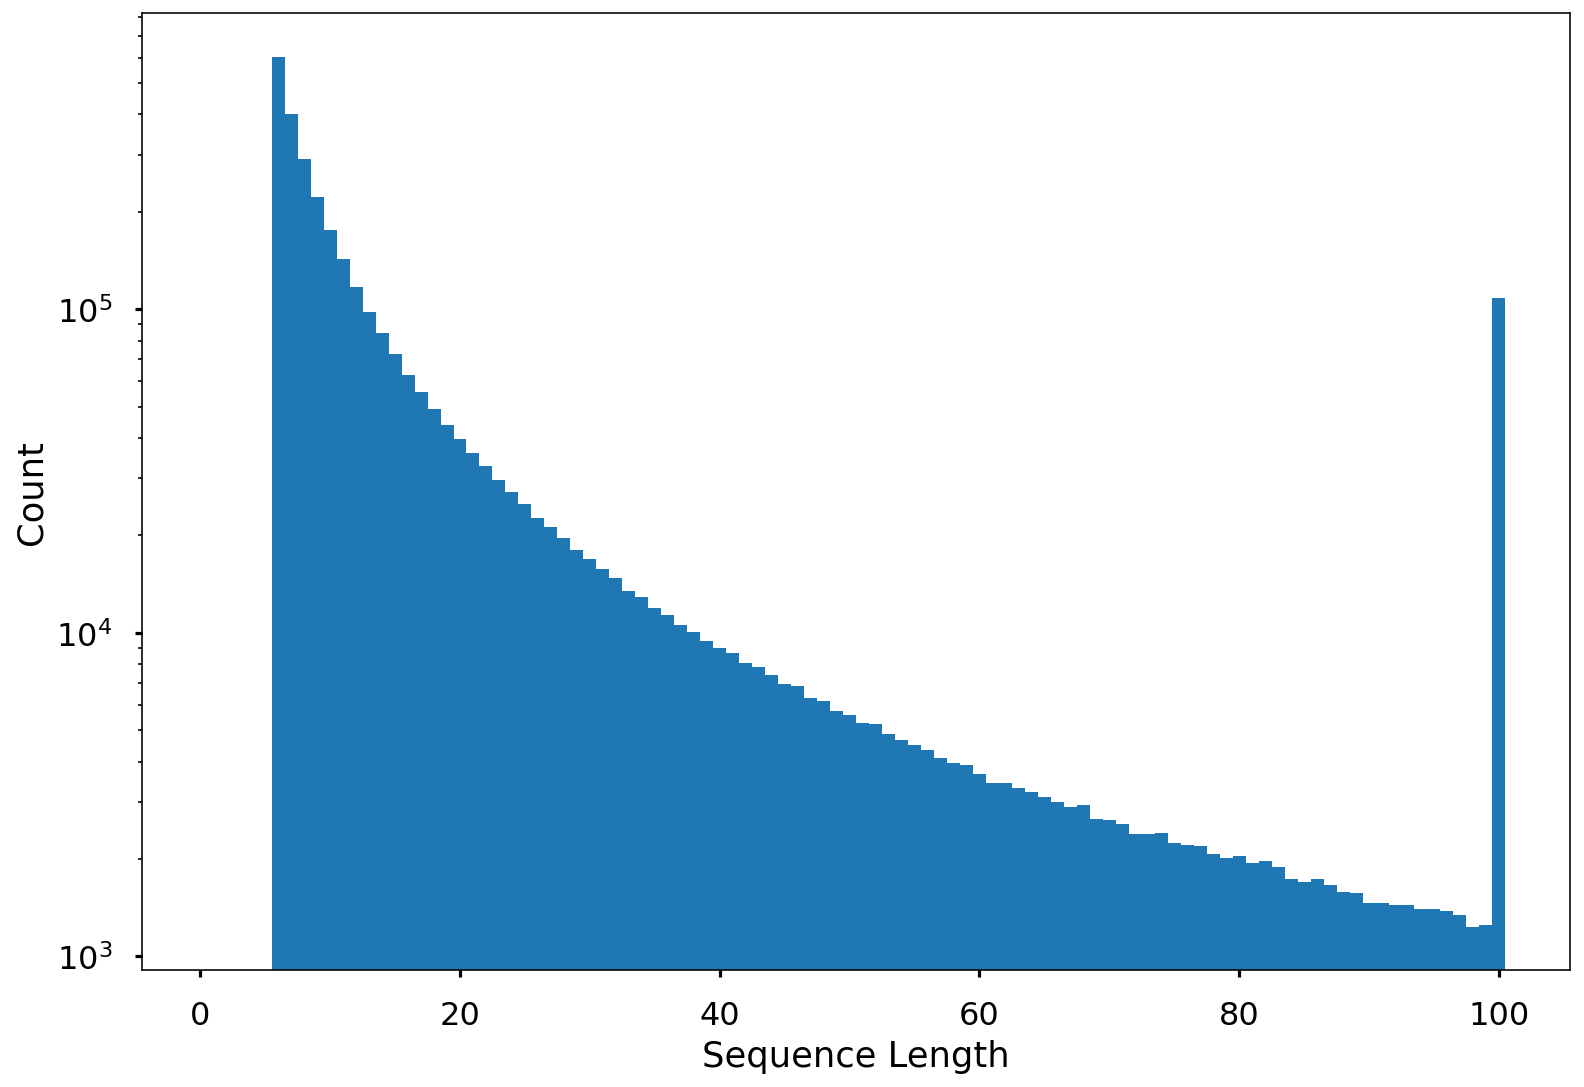

In [96]:
# lengths = [len(s[0]) for s in all_sequences]
fig, ax = plt.subplots(1,1)
ax.hist(lengths, bins = np.arange(0.5,101.5), log=True)
ax.set_xlabel('Sequence Length')
ax.set_ylabel('Count')
plt.savefig('../figs/seq_lengths_truncated.png')

# Old Untruncated

In [97]:
all_sequences = []
for i, (user, user_df) in enumerate(tqdm(grouped_users)):
    user_df = user_df.sort_values(by='ini_dat')
    time_diff = user_df['ini_dat'].diff()
    split_points = np.where(time_diff > 60*60*24)[0]
    previous_split = 0
    for split_point in split_points:
        if split_point - previous_split > 5:
            seq = user_df[previous_split:split_point]
            all_sequences.append((seq['fsq_id'].values, seq['ini_dat'].values))
            previous_split=split_point

100%|██████████| 243644/243644 [03:06<00:00, 1303.34it/s]


Calculating best minimal value for power law fit


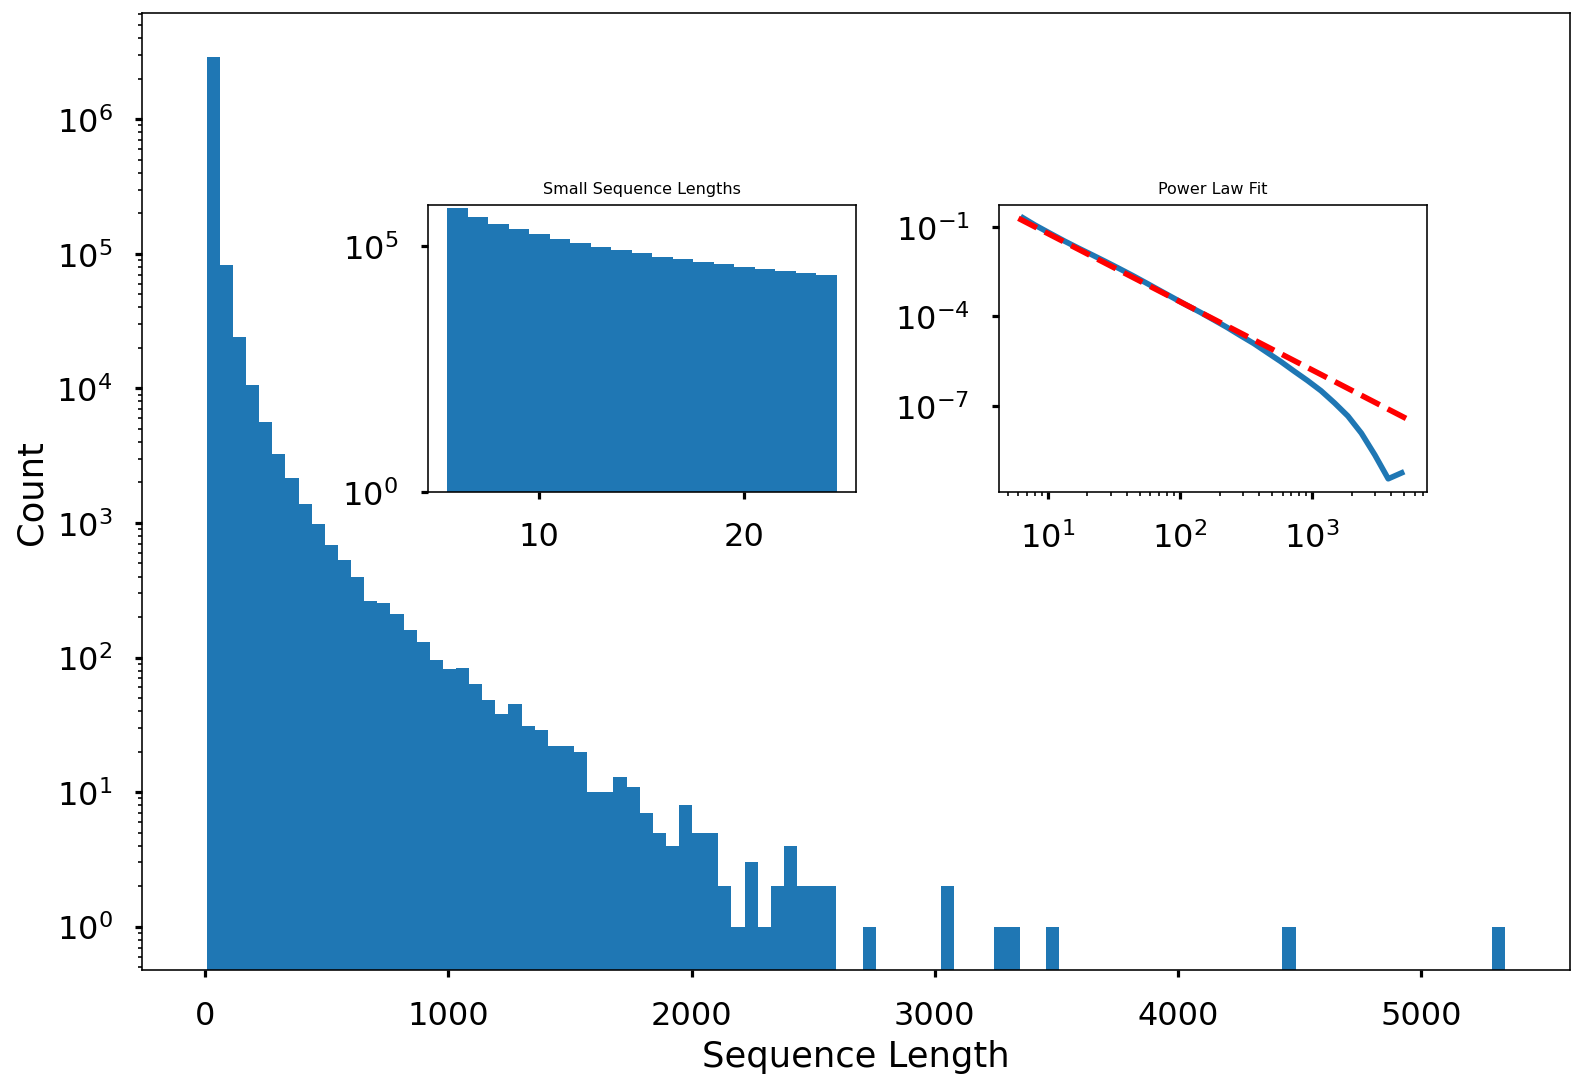

In [98]:
lengths = [len(s[0]) for s in all_sequences]
fig, ax = plt.subplots(1,1)
ax.hist(lengths, bins = 99, log=True)
ax.set_xlabel('Sequence Length')
ax.set_ylabel('Count')

# Make inset plot
axins = ax.inset_axes([0.2, 0.5, 0.3, 0.3])
axins.hist(lengths, bins=np.arange(5.5,25.5), log=True)
# Show zero on yaxis labels
axins.set_yticks([1,10**5])
axins.set_title('Small Sequence Lengths', fontsize=8)

# Make inset plot
import powerlaw
fit = powerlaw.Fit(lengths,discrete=True)

axins = ax.inset_axes([0.6, 0.5, 0.3, 0.3])
axins.set_title('Power Law Fit', fontsize=8)

fit.plot_pdf(linestyle='-', ax=axins)
fit.power_law.plot_pdf(color= 'r',linestyle='--', ax=axins)

plt.savefig('../figs/seq_length_dist_truncated.png')

Calculating best minimal value for power law fit


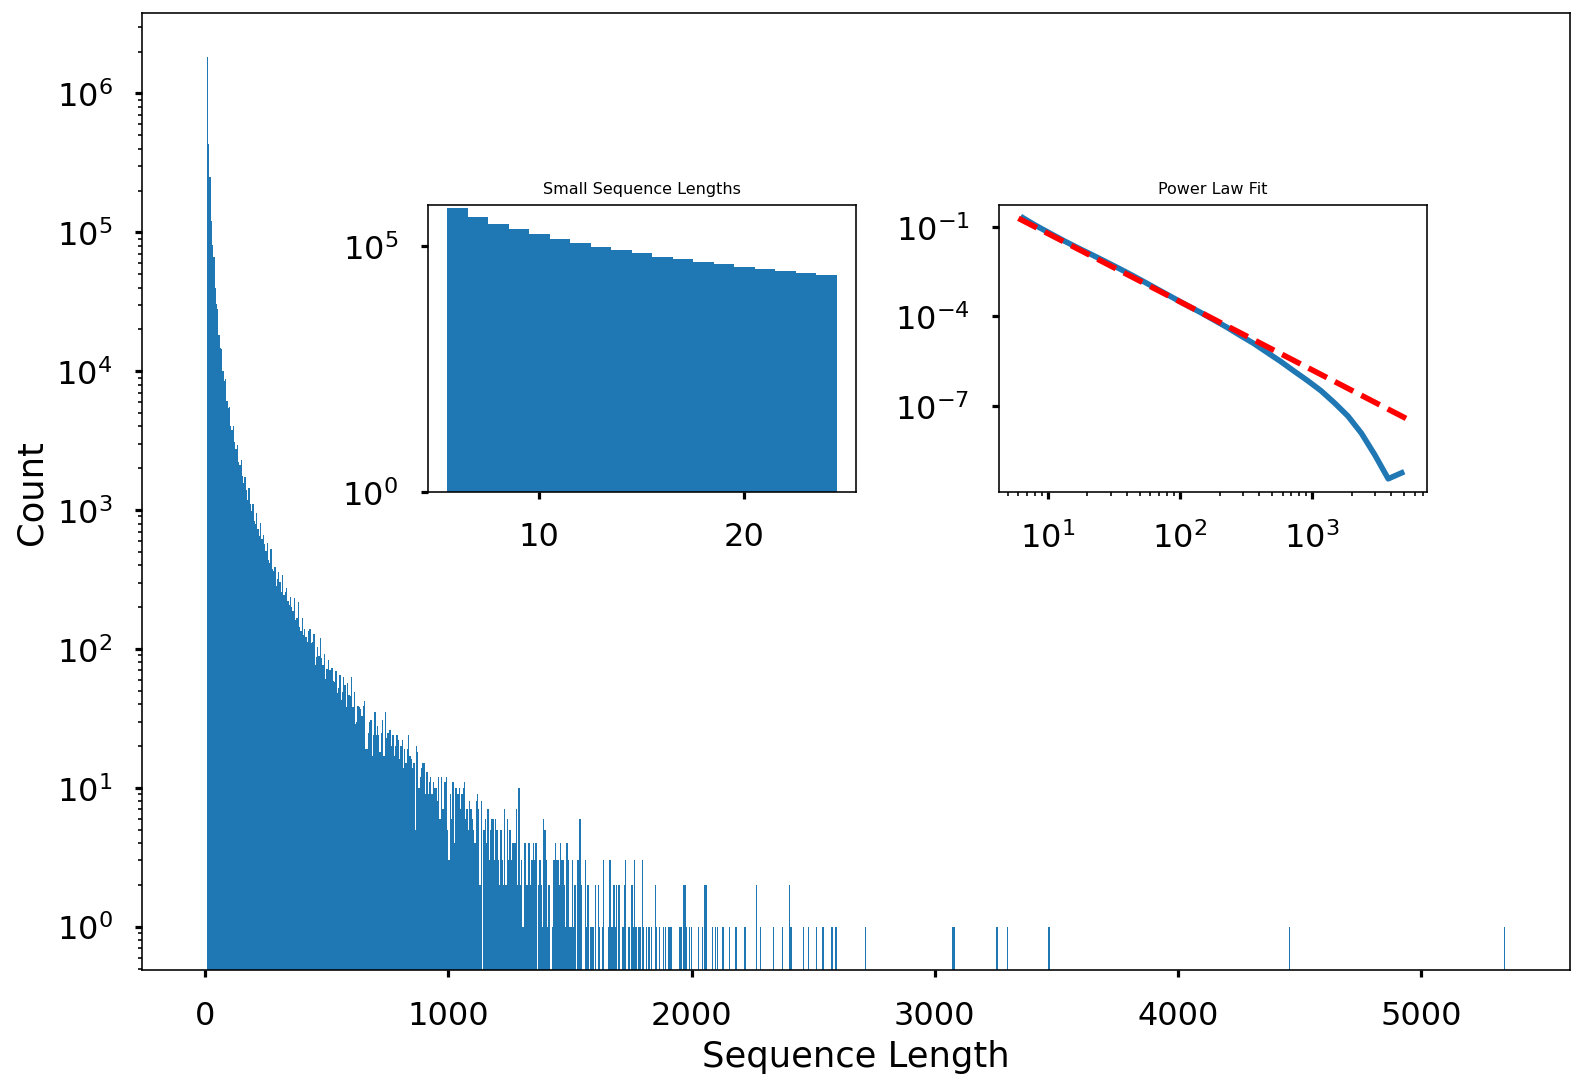

In [99]:
lengths = [len(s[0]) for s in all_sequences]
fig, ax = plt.subplots(1,1)
ax.hist(lengths, bins = 1000, log=True)
ax.set_xlabel('Sequence Length')
ax.set_ylabel('Count')

# Make inset plot
axins = ax.inset_axes([0.2, 0.5, 0.3, 0.3])
axins.hist(lengths, bins=np.arange(5.5,25.5), log=True)
# Show zero on yaxis labels
axins.set_yticks([1,10**5])
axins.set_title('Small Sequence Lengths', fontsize=8)

# Make inset plot
import powerlaw
fit = powerlaw.Fit(lengths,discrete=True)

axins = ax.inset_axes([0.6, 0.5, 0.3, 0.3])
axins.set_title('Power Law Fit', fontsize=8)

fit.plot_pdf(linestyle='-', ax=axins)
fit.power_law.plot_pdf(color= 'r',linestyle='--', ax=axins)

plt.savefig('../figs/seq_length_dist_untruncated.png')

# Scratch

In [2]:
def read_file(data_file):
    with open(data_file, 'r') as f:
        lines = f.readlines()
    lis = []
    for line in lines:
        l = line.strip().split(' ')
        l = [int(s) for s in l]
        lis.append(l)
    return lis


f = read_file('../MoveSim/data/geoid/real.data')

In [5]:
len(f[0])

32